In [36]:

import pandas as pd
import matplotlib.pyplot as plt

From which countries has Spain admitted the highest number of refugees?
What are the general trends in refugee statistics from 2012-2022?

In [18]:
data = pd.read_csv('AsiloEspaa.csv')

In [19]:
data = pd.DataFrame(data)

From which countries has Spain admitted the highest number of refugees?


In [20]:
# Check missing values
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Unnamed: 0,0
Nacionalidad,0
Hombres,0
Mujeres,0
Total,0
Admitidas,0
Año,0


In [28]:
data.head()

,Unnamed: 0,Nacionalidad,Hombres,Mujeres,Total,Admitidas,Año
0,0,afganistan,33,13,46,45,2012
1,1,albania,3,3,6,5,2012
2,2,angola,9,8,17,6,2012
3,3,argelia,174,28,202,171,2012
4,4,argentina,4,1,5,4,2012


In [29]:
data.groupby('Nacionalidad')['Admitidas'].sum()


KeyError: 'Nacionalidad'

In [24]:
most_admitted= data.groupby('Nacionalidad')['Admitidas'].sum().reset_index(name='Admitidas').sort_values(by = 'Admitidas', ascending=False).head(10)

KeyError: 'Nacionalidad'

What are the general trends in refugee and asylum statistics from 2012-2022?

In [34]:
yrly = data.groupby('Año')['Admitidas'].sum().reset_index(name='Admitidas').sort_values(by='Año')
yrly.reset_index(drop=True)

,Año,Admitidas
0,2012,1117
1,2013,3917
2,2014,4896
3,2015,13539
4,2016,15245
5,2017,29343
6,2018,47740
7,2019,1659
8,2020,4333
9,2021,65017


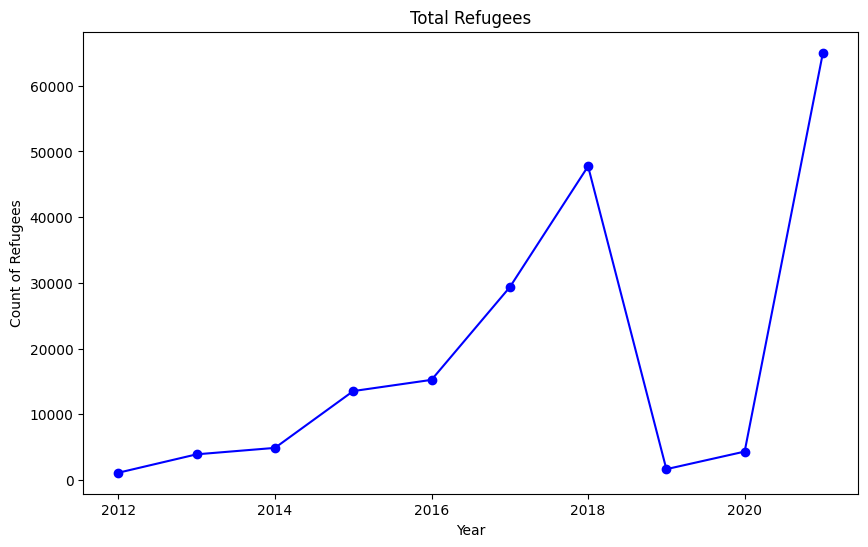

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(yrly['Año'], yrly['Admitidas'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Refugees')
plt.title('Total Refugees')

plt.show()

In [43]:
yrly_gender = data.groupby('Año')[['Hombres', 'Mujeres', 'Admitidas']].sum().reset_index()

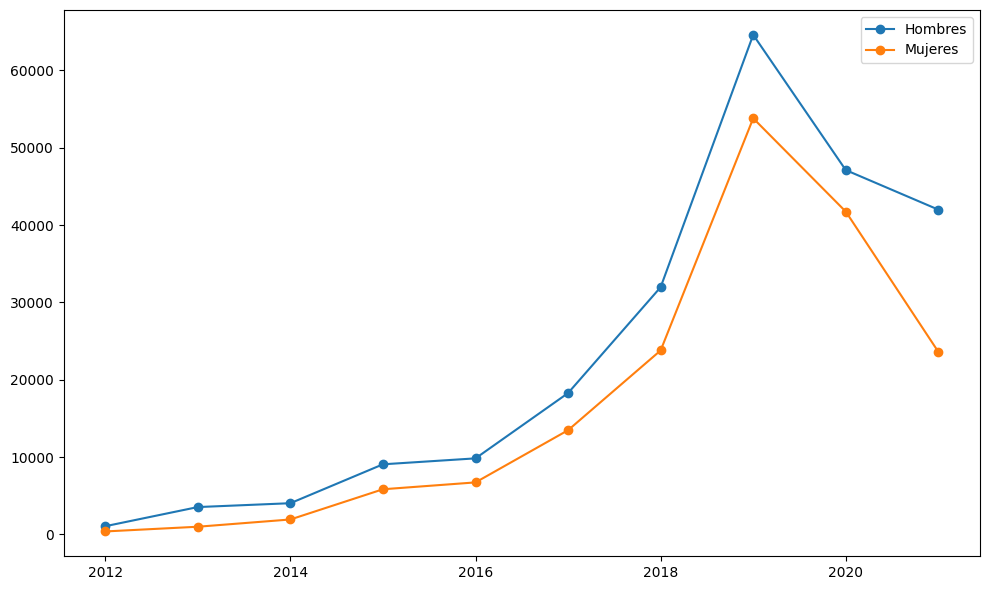

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(yrly_gender['Año'], yrly_gender['Hombres'], label='Hombres', marker='o')
plt.plot(yrly_gender['Año'], yrly_gender['Mujeres'], label='Mujeres', marker='o')

plt.tight_layout()
plt.legend()
plt.show()